In [1]:
# Pymaceuticals HW Week 5 Matplotlib - I work in healthcares so I chose this homework.
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data_complete = pd.merge(clinical_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vols_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_vols_mean = pd.DataFrame(tumor_vols_mean)

# Preview DataFrame
tumor_vols_mean.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vols_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_vols_sem = pd.DataFrame(tumor_vols_sem)

# Preview DataFrame
tumor_vols_sem.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_vols_pivot_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
tumor_vols_pivot_sem


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


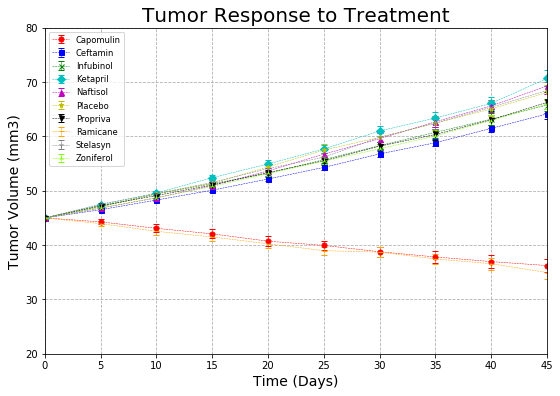

In [101]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(9,6))
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"],marker="o", color="r", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ceftamin"], yerr=tumor_vols_pivot_sem["Ceftamin"],marker="s", color="b", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"],marker="x", color="g", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"],marker="D", color="c", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Naftisol"], yerr=tumor_vols_pivot_sem["Naftisol"],marker="^", color="m", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"],marker="*", color="y", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Propriva"], yerr=tumor_vols_pivot_sem["Propriva"],marker="v", color="k", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ramicane"], yerr=tumor_vols_pivot_sem["Ramicane"],marker="_", color="orange", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Stelasyn"], yerr=tumor_vols_pivot_sem["Stelasyn"],marker="1", color="grey", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Zoniferol"], yerr=tumor_vols_pivot_sem["Zoniferol"],marker="2", color="chartreuse", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)

plt.ylim(20, 80)
plt.xlim(0,45)

plt.title("Tumor Response to Treatment", fontsize=20)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
plt.xlabel("Time (Days)", fontsize=14)
plt.grid(linestyle="dashed")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Fig1.png")


In [ ]:
# Show the Figure
plt.show()

In [ ]:
# Observation1 - Ketapril tumor response is worse than placebo
# Observation2 - Capomulin tumor response is better than all drugs except Ramicane

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
met_sites_mean = pd.DataFrame(met_sites_mean)

# Preview DataFrame
met_sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [20]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
met_sites_sem = pd.DataFrame(met_sites_sem)

# Preview DataFrame
met_sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [22]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_mean = met_sites_mean.reset_index()
met_sites_pivot_mean = met_sites_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

met_sites_sem = met_sites_sem.reset_index()
met_sites_pivot_sem = met_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]


# Preview that Reformatting worked
met_sites_pivot_mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


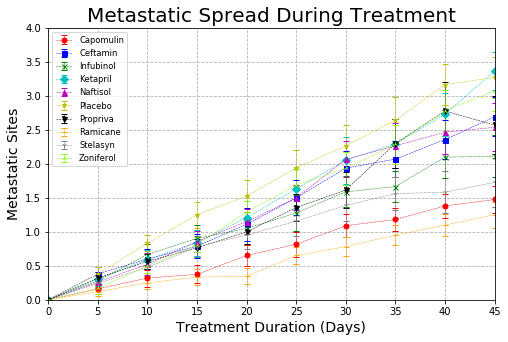

In [96]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(8,5))
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Capomulin"], yerr=met_sites_pivot_sem["Capomulin"],marker="o", color="r", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Ceftamin"], yerr=met_sites_pivot_sem["Ceftamin"],marker="s", color="b", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Infubinol"], yerr=met_sites_pivot_sem["Infubinol"],marker="x", color="g", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Ketapril"], yerr=met_sites_pivot_sem["Ketapril"],marker="D", color="c", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Naftisol"], yerr=met_sites_pivot_sem["Naftisol"],marker="^", color="m", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Placebo"], yerr=met_sites_pivot_sem["Placebo"],marker="*", color="y", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Propriva"], yerr=met_sites_pivot_sem["Propriva"],marker="v", color="k", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Ramicane"], yerr=met_sites_pivot_sem["Ramicane"],marker="_", color="orange", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Stelasyn"], yerr=met_sites_pivot_sem["Stelasyn"],marker="1", color="grey", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Zoniferol"], yerr=met_sites_pivot_sem["Zoniferol"],marker="2", color="chartreuse", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3)

plt.ylim(0, 4)
plt.xlim(0,45)

plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.ylabel("Metastatic Sites", fontsize=14)
plt.xlabel("Treatment Duration (Days)", fontsize=14)
plt.grid(linestyle="dashed")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Fig2.png")

# Show the Figure
plt.show()

In [ ]:
# Observation3 Once again best results appear with Ramicane - least number of metastatic sites over 45 treatment period
# Observation4 Placebo has the highest increase in metastatic sites until day 43/44 where it is surpassed by Ketapril

## Survival Rates

In [25]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = clinical_data_complete.groupby(["Drug", "Timepoint"]).count() ["Tumor Volume (mm3)"]

# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame
survival_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [27]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]


# Preview the Data Frame
survival_count_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


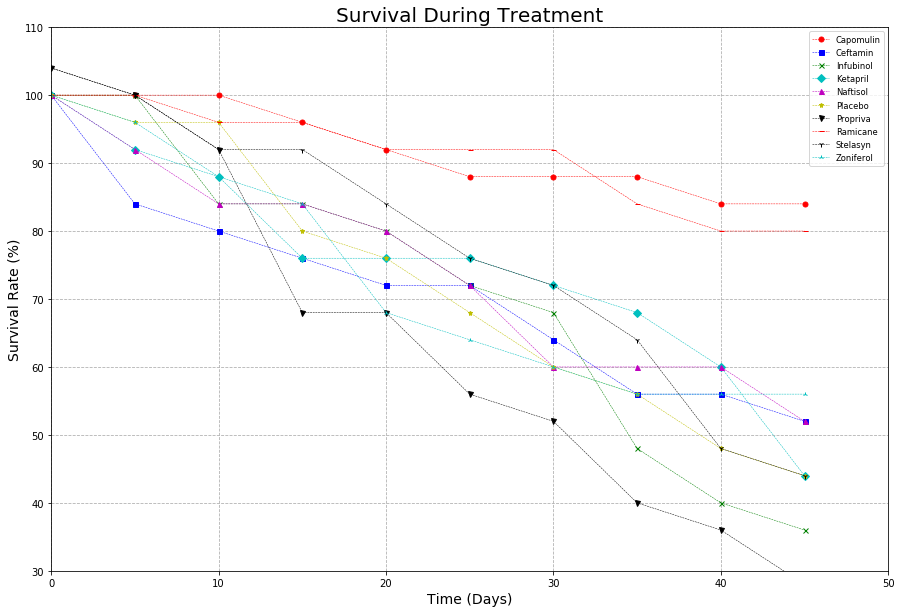

In [136]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(15,10))
plt.plot(100 * survival_count_pivot["Capomulin"]/25, "ro", linestyle="dashed", markersize=5, linewidth=0.5)
plt.plot(100 * survival_count_pivot["Ceftamin"]/25, "bs", linestyle="dashed", markersize=5, linewidth=0.5)
plt.plot(100 * survival_count_pivot["Infubinol"]/25, "gx", linestyle="dashed", markersize=5, linewidth=0.5)
plt.plot(100 * survival_count_pivot["Ketapril"]/25, "cD", linestyle="dashed", markersize=5, linewidth=0.5)
plt.plot(100 * survival_count_pivot["Naftisol"]/25, "m^", linestyle="dashed", markersize=5, linewidth=0.5)
plt.plot(100 * survival_count_pivot["Placebo"]/25, "y*", linestyle="dashed", markersize=5, linewidth=0.5)
plt.plot(100 * survival_count_pivot["Propriva"]/25, "kv", linestyle="dashed", markersize=5, linewidth=0.5)
plt.plot(100 * survival_count_pivot["Ramicane"]/25, "r_", linestyle="dashed", markersize=5, linewidth=0.5)
plt.plot(100 * survival_count_pivot["Stelasyn"]/25, "k1", linestyle="dashed", markersize=5, linewidth=0.5)
plt.plot(100 * survival_count_pivot["Zoniferol"]/25, "c2", linestyle="dashed", markersize=5, linewidth=0.5)

plt.ylim(30,110)
plt.xlim(0,50)

plt.title ("Survival During Treatment", fontsize=20)
plt.ylabel("Survival Rate (%)", fontsize=14)
plt.xlabel("Time (Days)", fontsize=14) 
plt.grid(linestyle="dashed")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Fig3.png")
         
         
# Show the Figure
plt.show()

## Summary Bar Graph

In [40]:
# Calculate the percent changes for each drug
tumor_pct_change = 100*((tumor_vols_pivot_mean.iloc[-1] - tumor_vols_pivot_mean.iloc[0])/tumor_vols_pivot_mean.iloc[0])

# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

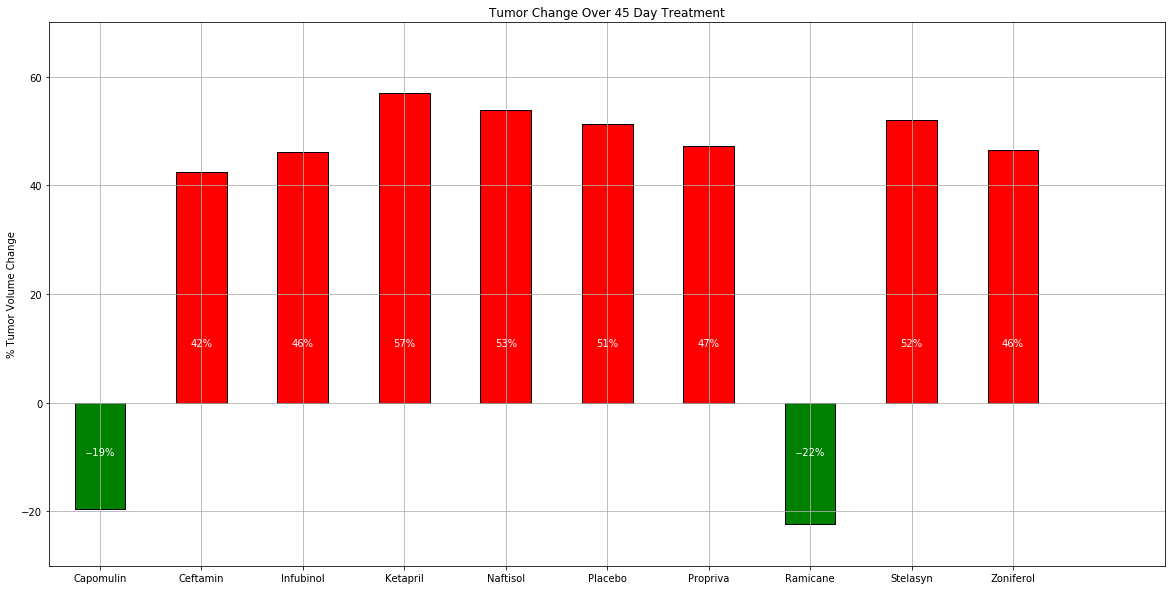

In [132]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change ["Capomulin"],
              tumor_pct_change ["Ceftamin"],
              tumor_pct_change ["Infubinol"],
              tumor_pct_change ["Ketapril"],
              tumor_pct_change ["Naftisol"],
              tumor_pct_change ["Placebo"],
              tumor_pct_change ["Propriva"],
              tumor_pct_change ["Ramicane"],
              tumor_pct_change ["Stelasyn"],
              tumor_pct_change ["Zoniferol"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots(figsize=(20,10))
ind = np.arange(len(pct_changes))
width=.5
rectsPass = ax.bar(ind[0], pct_changes[0],width,color='g',ec="black")
rectsFail = ax.bar(ind[1:7], pct_changes[1:7],width,color="r",ec="black")
rectsPass2 = ax.bar(ind[7], pct_changes[7],width,color='g',ec="black")
rectsFail2 = ax.bar(ind[8:], pct_changes[8:],width,color='r',ec="black")

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind)
ax.set_xticklabels(('Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30, 70])
ax.set_xlim([-0.5, 10.5])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 10,
               '%d%%' % int(height),
               ha='center', va='bottom', color ='white')
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -10,
               '-%d%%' % int(height),
               ha='center', va='bottom', color='white')
def autolabelPass2(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -10,
               '-%d%%' % int(height),
               ha='center', va='bottom', color ='white')
def autolabelFail2(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 10,
               '%d%%' % int(height),
               ha='center', va='bottom', color ='white')        
        

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)
autolabelPass2(rectsPass2)
autolabelFail2(rectsFail2)

# Save the Figure
plt.savefig("Fig4.png")


# Show the Figure

plt.show()